#Section9

#Content


1. BLAST (Basic Local Alignment Search Tool)

2. panda's analysis

3. matplotlib visualization

In [ ]:
!pip install biopython
from Bio.SeqUtils.ProtParam import ProteinAnalysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 15.2 MB/s eta 0:00:00


In [ ]:
from Bio.Blast import NCBIWWW

sequence = "MKTIIALSYIFCLVFA"
result_handle = NCBIWWW.qblast("blastp", "swissprot", sequence)
blast_results = result_handle.read()

with open("blast_results.xml", "w") as file:
    file.write(blast_results)


alignment.title
: The title or description of the aligned sequence.

alignment.length: The length of the aligned sequence.

hsp.expect: The E-value (Expect value) - a measure of the statistical significance of the alignment. Lower E-values indicate higher significance.

hsp.query: The portion of the query sequence involved in the HSP.

hsp.match: Symbols showing matches, mismatches, and gaps between query and subject.

hsp.sbjct: The portion of the subject (database) sequence involved in the HSP.

In [ ]:
from Bio.Blast import NCBIXML

with open("/content/blast_results.xml") as file:
    blast_record = NCBIXML.read(file)

for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        print("****Alignment****")
        print("Sequence Titles:", alignment.title)
        print("Length:", alignment.length)
        print("E-value:", hsp.expect)
        print("Query:", hsp.query)
        print("Match:", hsp.match)
        print("Subject:", hsp.sbjct)


****Alignment****
Sequence Titles: sp|P03435.1| RecName: Full=Hemagglutinin; Contains: RecName: Full=Hemagglutinin HA1 chain; Contains: RecName: Full=Hemagglutinin HA2 chain; Flags: Precursor [Influenza A virus (A/Victoria/3/1975(H3N2))]
Length: 567
E-value: 0.000307243
Query: MKTIIALSYIFCLVFA
Match: MKTIIALSYIFCLVFA
Subject: MKTIIALSYIFCLVFA
****Alignment****
Sequence Titles: sp|Q2RFA5.1| RecName: Full=Hemagglutinin; Contains: RecName: Full=Hemagglutinin HA1 chain; Contains: RecName: Full=Hemagglutinin HA2 chain; Flags: Precursor [Influenza A virus (A/Memphis/110/1976(H3N2))]
Length: 566
E-value: 0.000307262
Query: MKTIIALSYIFCLVFA
Match: MKTIIALSYIFCLVFA
Subject: MKTIIALSYIFCLVFA
****Alignment****
Sequence Titles: sp|P26139.2| RecName: Full=Hemagglutinin; Contains: RecName: Full=Hemagglutinin HA1 chain; Contains: RecName: Full=Hemagglutinin HA2 chain; Flags: Precursor [Influenza A virus (A/swine/Colorado/1/1977(H3N2))]
Length: 566
E-value: 0.000307262
Query: MKTIIALSYIFCLVFA
Match: M

--------------------------------

#Using Pandas for Protein Sequence Analysis
Pandas can help in:

Storing BLAST results in a DataFrame

Filtering results based on E-values or sequence identity

Analyzing amino acid composition

In [ ]:
import pandas as pd
from Bio.Blast import NCBIXML

# Parse BLAST XML file
with open("/content/blast_results.xml") as file:
    blast_record = NCBIXML.read(file)

# Extract relevant data
data = []
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        data.append({
            "Sequence Titles": alignment.title,
            "Length": alignment.length,
            "E-value": hsp.expect,
            "Score": hsp.score,
            "Identity": hsp.identities
        })

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Display top hits sorted by E-value
print(df.sort_values("E-value"))


                                      Sequence Titles  Length   E-value  \
0   sp|P03435.1| RecName: Full=Hemagglutinin; Cont...     567  0.000307   
1   sp|Q2RFA5.1| RecName: Full=Hemagglutinin; Cont...     566  0.000307   
2   sp|P26139.2| RecName: Full=Hemagglutinin; Cont...     566  0.000307   
3   sp|Q2RCH5.1| RecName: Full=Hemagglutinin; Cont...     566  0.000307   
4   sp|Q38SQ8.1| RecName: Full=Hemagglutinin; Cont...     566  0.000307   
5   sp|Q30NQ1.1| RecName: Full=Hemagglutinin; Cont...     566  0.001197   
6   sp|O11283.2| RecName: Full=Hemagglutinin; Cont...     566  0.002111   
7   sp|Q2VNF2.1| RecName: Full=Hemagglutinin; Cont...     566  0.002375   
8   sp|Q2VND2.1| RecName: Full=Hemagglutinin; Cont...     566  0.002375   
9   sp|P12583.3| RecName: Full=Hemagglutinin; Cont...     566  0.003123   
10  sp|P03439.2| RecName: Full=Hemagglutinin; Cont...     566  0.007611   
11  sp|Q1PUD9.1| RecName: Full=Hemagglutinin; Cont...     566  0.007611   
12  sp|P19106.2| RecName:

Filtering Low-Quality Matches

You can quickly remove low-confidence results using:

In [ ]:
df[df["E-value"] < 0.001]


,Sequence Titles,Length,E-value,Score,Identity
0,sp|P03435.1| RecName: Full=Hemagglutinin; Cont...,567,0.000307,84.0,16
1,sp|Q2RFA5.1| RecName: Full=Hemagglutinin; Cont...,566,0.000307,84.0,16
2,sp|P26139.2| RecName: Full=Hemagglutinin; Cont...,566,0.000307,84.0,16
3,sp|Q2RCH5.1| RecName: Full=Hemagglutinin; Cont...,566,0.000307,84.0,16
4,sp|Q38SQ8.1| RecName: Full=Hemagglutinin; Cont...,566,0.000307,84.0,16


In [ ]:
# Filter for high-scoring and short sequences
filtered_df = df[(df["Score"] >84) & (df["Length"] < 576)]

In [ ]:
filtered_df.head(1)
df.head(1)

,Sequence Titles,Length,E-value,Score,Identity
0,sp|P03435.1| RecName: Full=Hemagglutinin; Cont...,567,0.000307,84.0,16


In [ ]:
# Add a new column with a custom metric
df["CustomMetric"] = df["Score"] / 100

In [ ]:
df.head(1)


,Sequence Titles,Length,E-value,Score,Identity,CustomMetric
0,sp|P03435.1| RecName: Full=Hemagglutinin; Cont...,567,0.000307,84.0,16,0.84


#Using Matplotlib for Protein Sequence Visualization

Scatter Plot → Shows relationships between E-value & Score

Bar Plot → Identifies the best identity-matching sequences

Box Plot → Displays score distribution

Histogram → Analyzes sequence length distribution

Heatmap → Shows correlations between numeric features

Line Plot → Visualizes E-value trends

Difference Between Bar Plot and Histogram

Bar Plot (plt.bar() / plt.barh()) → Compares categorical data (e.g., E-values per sequence).

Histogram (plt.hist()) → Shows the distribution of continuous numerical data (e.g., the frequency of different E-values).

#BarPlot

Prepare the Data:

df.head(6): This selects the first 6 rows of the DataFrame df (which presumably contains your BLAST results).
.sort_values("E-value"): This sorts these 6 rows based on the "E-value" column in ascending order (lower E-values first). The sorted data is stored in a new DataFrame called df_sorted.


Create the Horizontal Bar Plot:

plt.barh(): This function creates the horizontal bar plot.
df_sorted["Sequence Titles"]: This provides the labels for the y-axis (the sequence titles).
df_sorted["E-value"]: This provides the data values for the bar lengths (the E-values).
color='skyblue': This sets the color of the bars to sky blue.

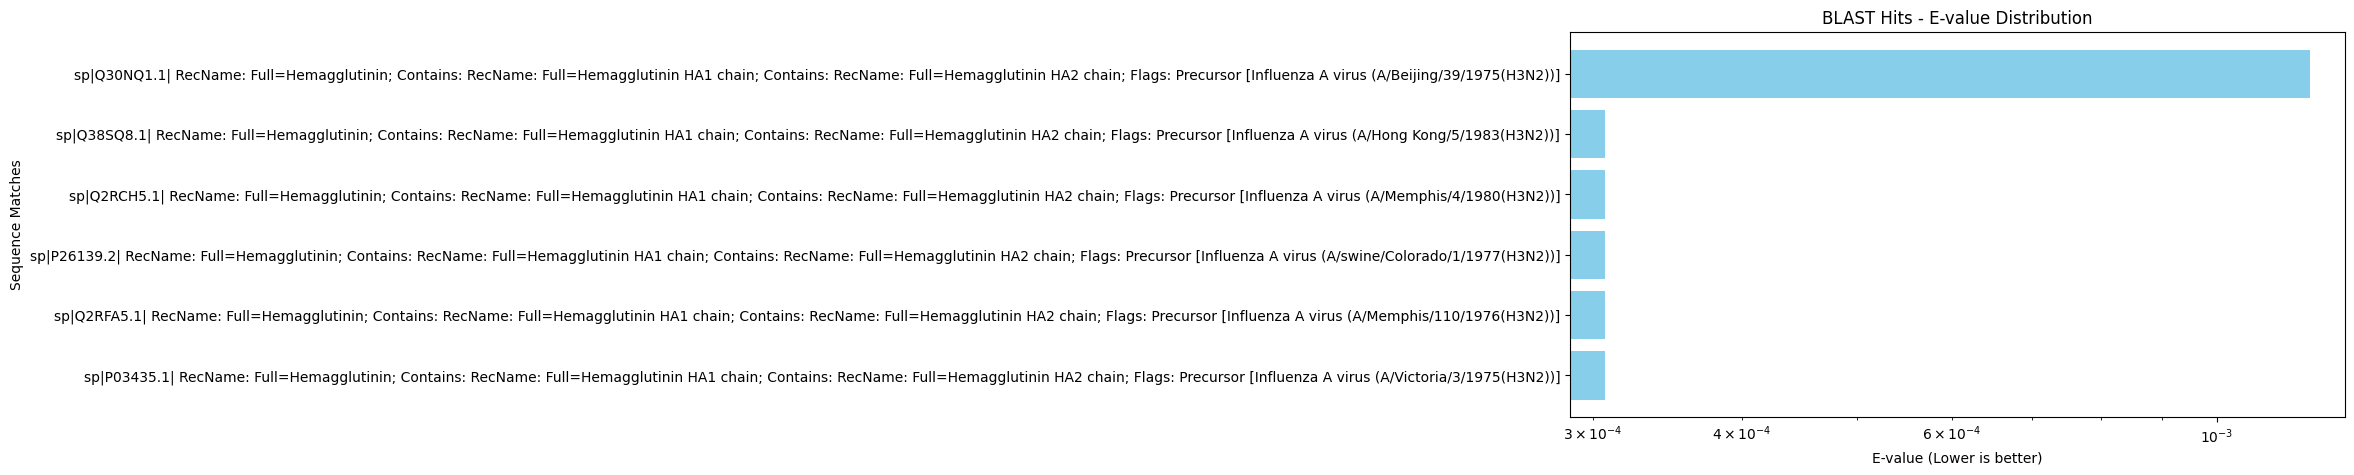

In [ ]:
import matplotlib.pyplot as plt

# Select the first 6 rows and sort them by E-value
df_sorted = df.head(6).sort_values("E-value")

# Plot E-values
plt.figure(figsize=(10, 5))
plt.barh(df_sorted["Sequence Titles"], df_sorted["E-value"], color='skyblue')
plt.xlabel("E-value (Lower is better)")
plt.ylabel("Sequence Matches")
plt.title("BLAST Hits - E-value Distribution")
plt.xscale("log")  # Log scale for better visualization
plt.show()


# Scatter Plot (E-value vs. Score)

This can help identify whether there is a correlation between E-value (relevance) and Score.

Insight:

High-score matches should have lower E-values.
Clustering of points can indicate the presence of significant matches

import matplotlib.pyplot as plt: This line imports the pyplot module from the matplotlib library and gives it a shorter alias plt for easier use.
 matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB.

plt.figure(figsize=(8,5)): This line creates a new figure (the window where the plot will appear) and sets its size to 8 inches wide and 5 inches tall.

plt.scatter(df["E-value"], df["Score"], color="blue", alpha=0.7): This is the core of the plot.

plt.scatter() is the function that creates a scatter plot.

df["E-value"] provides the data for the x-axis (the E-values from your DataFrame).

df["Score"] provides the data for the y-axis (the Scores from your DataFrame).

color="blue" sets the color of the points to blue.

alpha=0.7 makes the points slightly transparent (70% opaque).

plt.xscale("log"): This line sets the x-axis (E-value) to a logarithmic scale.
 This is often useful for E-values because they can span a very wide range.

 The log scale helps to visualize the data more effectively when there are very small and very large values.

plt.xlabel("E-value (Lower is better)"): This adds a label to the x-axis.

plt.ylabel("Score"): This adds a label to the y-axis.

plt.title("E-value vs. Score"): This adds a title to the plot.

plt.show(): This line displays the created plot. Without it, the plot would be generated but not shown on your screen.

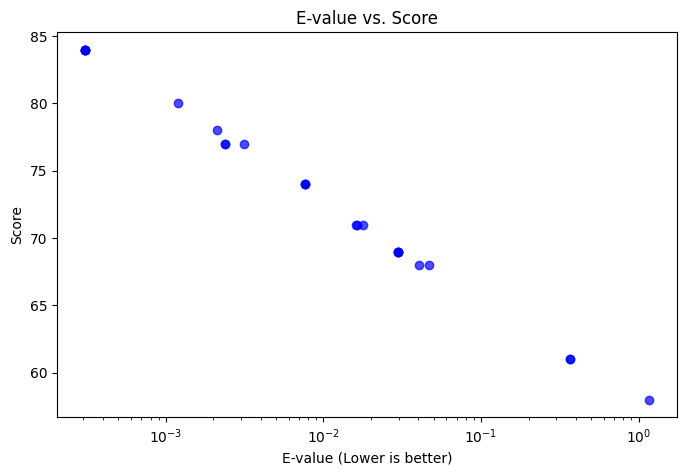

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["E-value"], df["Score"], color="blue", alpha=0.7)
plt.xscale("log")  # Log scale for better separation of E-values
plt.xlabel("E-value (Lower is better)")
plt.ylabel("Score")
plt.title("E-value vs. Score")
plt.show()


#Box Plot (Score Distribution)

A box plot can show how the Score values are distributed.

Importing seaborn:
import seaborn as sns
Use code with caution
This line imports the seaborn library, which is a powerful tool for creating statistical visualizations in Python. We typically use the alias sns for convenience.

Creating a Figure:
plt.figure(figsize=(6,4))
Use code with caution
This line creates a new figure using matplotlib.pyplot (which is likely imported as plt earlier in the code).

figsize=(6,4) sets the width and height of the figure to 6 inches and 4 inches, respectively.

Generating the Box Plot:
sns.boxplot(x=df["Score"], color="orange")
Use code with caution
This is the key line that generates the box plot itself using the sns.boxplot() function from seaborn.

x=df["Score"] specifies that the data for the box plot comes from the "Score" column of the df DataFrame (which presumably contains your BLAST results).
color="orange" sets the color of the box plot to orange.

Adding Labels and Title:
plt.xlabel("Score")
   plt.title("Score Distribution of BLAST Hits")
Use code with caution
These lines add labels to the x-axis ("Score") and a title to the plot ("Score Distribution of BLAST Hits").

Displaying the Plot:
plt.show()

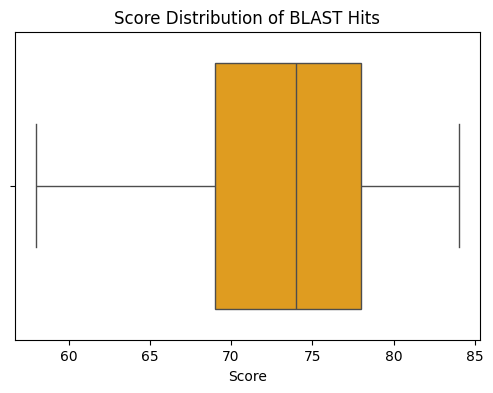

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Score"], color="orange")
plt.xlabel("Score")
plt.title("Score Distribution of BLAST Hits")
plt.show()


#Heatmap (Correlation Between Variables)
To see how E-value, Score, Identity, and Length are related

import seaborn as sns: This line imports the seaborn library, which is a powerful tool for creating statistical visualizations in Python. We typically use the alias sns for convenience.

plt.figure(figsize=(6,5)): This line creates a new figure (the window where the plot will appear) using matplotlib.pyplot (which you likely imported as plt earlier). figsize=(6,5) sets the width and height of the figure to 6 inches and 5 inches, respectively.

sns.heatmap(...): This is the core of the code that generates the heatmap. Let's break down the arguments:

df[["Length", "E-value", "Score", "Identity"]].corr(): This part selects the columns "Length", "E-value", "Score", and "Identity" from your DataFrame (df) and calculates the correlation between them using the .corr() method. The result is a correlation matrix.
annot=True: This argument tells the heatmap to display the correlation values on each cell of the heatmap.
cmap="coolwarm": This sets the color map for the heatmap to "coolwarm". This means lower correlation values will be represented in cooler colors (e.g., blue), and higher correlation values will be represented in warmer colors (e.g., red).
linewidths=0.5: This adds lines between the cells of the heatmap with a width of 0.5.
plt.title("Correlation Heatmap"): This adds a title to the heatmap.

plt.show(): This line displays the created heatmap. Without it, the plot would be generated but not shown on your screen.

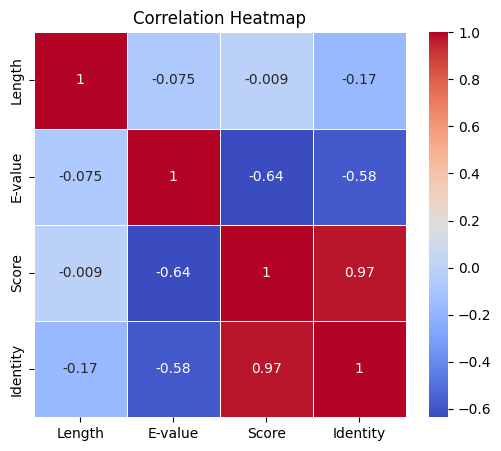

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(df[["Length", "E-value", "Score", "Identity"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#Line Plot (E-value Over Rank)
To see how E-values change as you move through ranked sequences.

Creating a Line Plot to Visualize E-value Trends

This code snippet creates a line plot using the matplotlib.pyplot module (imported as plt) to visualize how E-values change across ranked sequences. This can help identify trends and patterns in the BLAST results.

df_sorted = df.sort_values("E-value")
Use code with caution
This line sorts the DataFrame df based on the "E-value" column in ascending order (from smallest to largest E-value).

 The sorted DataFrame is stored in a new variable called df_sorted. This ensures that sequences are ranked by their E-value significance.

plt.figure(figsize=(8,5))
Use code with caution
This line creates a new figure (the window where the plot will appear) with a specified size of 8 inches by 5 inches using plt.figure(). This sets up the drawing area for the line plot.

plt.plot(df_sorted.index, df_sorted["E-value"], marker="o", linestyle="-", color="red")
Use code with caution
This line creates the line plot itself using plt.plot():

df_sorted.index: The x-axis values represent the ranked positions of the sequences in the sorted DataFrame.

df_sorted["E-value"]: The y-axis values represent the E-values of the corresponding ranked sequences.

marker="o": This adds circular markers to each data point on the line.

linestyle="-": This specifies a solid line style to connect the data points.

color="red": This sets the color of the line and markers to red.

plt.xscale("log")
Use code with caution
This line sets the x-axis to a logarithmic scale using plt.xscale("log").

 This is often useful when dealing with a wide range of values (like E-values) as it compresses the scale and helps visualize patterns more clearly.

plt.xlabel("Ranked Sequences")
plt.ylabel("E-value")
plt.title("E-value Trend Across Sequences")
Use code with caution
These lines add labels to the x-axis and y-axis and a title to the plot for clarity and context using plt.xlabel(), plt.ylabel(), and plt.title().

plt.show()
Use code with caution
This line displays the generated line plot using plt.show().

 Without this line, the plot would be created but not displayed on your screen.

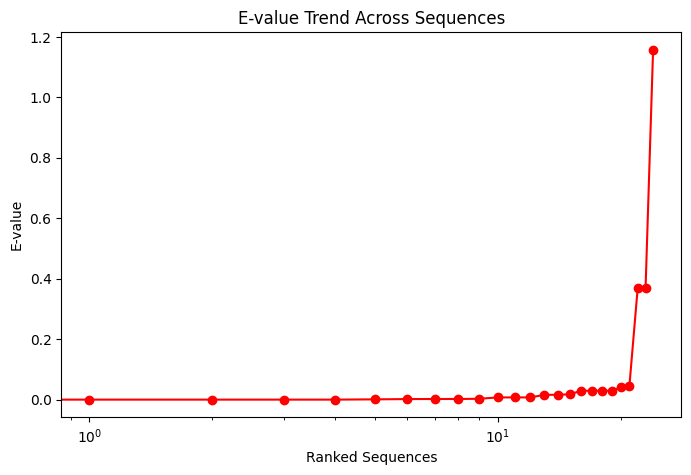

In [ ]:
df_sorted = df.sort_values("E-value")
plt.figure(figsize=(8,5))
plt.plot(df_sorted.index, df_sorted["E-value"], marker="o", linestyle="-", color="red")
plt.xscale("log")
plt.xlabel("Ranked Sequences")
plt.ylabel("E-value")
plt.title("E-value Trend Across Sequences")
plt.show()


------------------------------------------------------------